In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from functools import reduce
from itertools import cycle, islice
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [11.5,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1)

<ipython-input-1-fdc7ff668635>:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
path=r'C:/Users/Admin/python/EDA__Indian GDP/'

In [3]:
data = path +'SGDP.csv'
gdp_data= pd.read_csv(data)
gdp_data.head(5)

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0000,11063.0000,143175.0000,247144.0000,158074.0000,42367.0000,615606.0000,297539.0000,72720.0000,78254.0000,150918.0000,603778.0000,364048.0000,315561.0000,1272967.0000,12915.0000,19918.0000,7259.0000,11839.0000,227872.0000,266628.0000,436465.0000,11165.0000,751485.0000,359433.0000,19208.0000,724049.0000,115523.0000,nan,3979.0000,18768.0000,343767.0000,16818.0000,8736039.0000
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0000,12547.0000,156864.0000,282368.0000,177511.0000,38120.0000,724495.0000,347032.0000,82820.0000,87105.0000,174724.0000,691700.0000,412313.0000,380924.0000,1448466.0000,13748.0000,21872.0000,8362.0000,13619.0000,258275.0000,297734.0000,494004.0000,12338.0000,855481.0000,401493.0000,21663.0000,822903.0000,131835.0000,nan,4421.0000,21609.0000,391238.0000,18875.0000,9946636.0000
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0000,14602.0000,177745.0000,317101.0000,206690.0000,35921.0000,807623.0000,400662.0000,94764.0000,95893.0000,188567.0000,817886.0000,465041.0000,437737.0000,1647506.0000,16198.0000,22938.0000,10293.0000,16612.0000,291709.0000,334714.0000,549701.0000,13862.0000,971090.0000,452186.0000,25593.0000,944146.0000,149817.0000,nan,5159.0000,24787.0000,443783.0000,21870.0000,11236635.0000
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0000,16761.0000,198098.0000,373920.0000,234982.0000,40633.0000,895027.0000,437462.0000,104369.0000,100404.0000,217107.0000,921788.0000,526002.0000,481982.0000,1792122.0000,18043.0000,24408.0000,11559.0000,18414.0000,321971.0000,368011.0000,612194.0000,15209.0000,1092564.0000,511178.0000,29667.0000,1043371.0000,161985.0000,nan,5721.0000,27844.0000,492424.0000,24089.0000,12433749.0000
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0000,18784.0000,224234.0000,413503.0000,260776.0000,45002.0000,994316.0000,485184.0000,nan,118387.0000,241955.0000,1027068.0000,588337.0000,543975.0000,nan,nan,26745.0000,nan,nan,341887.0000,nan,nan,16637.0000,1212668.0000,575631.0000,nan,1153795.0000,184091.0000,nan,nan,30304.0000,551963.0000,26533.0000,13675331.0000


In [4]:
gdp_data.shape

(11, 36)

In [5]:
gdp_data.describe()

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
count,11.0000,9.0000,9.0000,9.0000,11.0000,9.0000,9.0000,11.0000,7.0000,9.0000,9.0000,9.0000,9.0000,11.0000,7.0000,7.0000,11.0000,7.0000,7.0000,11.0000,7.0000,7.0000,9.0000,11.0000,11.0000,7.0000,9.0000,9.0000,0.0000,7.0000,9.0000,11.0000,11.0000,11.0000
mean,280986.5618,8201.5167,100018.1678,181565.6733,120748.8791,22450.1200,448568.6744,228667.2718,50673.0643,53343.0011,108146.8078,451364.1022,261754.6678,254612.6664,880156.7586,8705.6671,13226.2927,5360.5143,8647.4086,165523.5182,181017.2914,298914.2600,7694.7744,565646.8409,268570.7873,13739.6914,520923.7189,82588.9478,nan,2759.8143,13707.0022,258693.0045,12527.4355,6479952.4536
std,282573.5324,8073.2761,97589.4975,178700.4977,120928.4804,21443.4298,438025.6272,228195.8956,48384.1211,51712.6685,105639.9050,444821.6063,256167.6851,257221.1141,838823.0427,8298.6926,12892.7626,5180.5337,8338.9660,163258.5689,172158.2435,284618.5131,7451.9832,563615.7890,268734.5491,13240.7973,508728.8361,80553.8583,nan,2627.0167,13399.0033,258176.5163,12445.8893,6433000.3626
min,8.4300,12.0700,9.5600,10.5900,10.9800,-10.0200,10.8200,9.1800,10.1400,4.7000,7.9200,11.4200,11.8500,10.1100,8.7800,6.4500,4.8700,12.3000,10.8500,6.1900,9.9500,11.2700,9.3900,10.4000,11.7000,12.7800,10.5100,8.1200,nan,10.8900,8.8400,10.9600,10.1400,9.9900
25%,14.0250,14.7900,13.1900,14.2500,12.9950,10.7500,11.4700,14.1350,14.1550,11.3100,15.1400,14.5600,13.1100,16.3250,13.7650,14.6100,9.6950,19.1500,18.5050,11.9000,12.0450,12.2750,10.5100,13.0100,12.8400,17.0300,13.6500,13.6500,nan,13.9050,14.7100,13.0950,11.8150,12.2450
50%,379402.0000,11063.0000,143175.0000,247144.0000,158074.0000,35921.0000,615606.0000,297539.0000,72720.0000,78254.0000,150918.0000,603778.0000,364048.0000,315561.0000,1272967.0000,12915.0000,19918.0000,7259.0000,11839.0000,227872.0000,266628.0000,436465.0000,11165.0000,751485.0000,359433.0000,19208.0000,724049.0000,115523.0000,nan,3979.0000,18768.0000,343767.0000,16818.0000,8736039.0000
75%,495370.0000,14602.0000,177745.0000,317101.0000,220836.0000,40633.0000,807623.0000,419062.0000,88792.0000,95893.0000,188567.0000,817886.0000,465041.0000,459859.5000,1547986.0000,14973.0000,23673.0000,9327.5000,15115.5000,306840.0000,316224.0000,521852.5000,13862.0000,1031827.0000,481682.0000,23628.0000,944146.0000,149817.0000,nan,4790.0000,24787.0000,468103.5000,22979.5000,11835192.0000
max,699307.0000,18784.0000,224234.0000,413503.0000,290140.0000,45002.0000,994316.0000,547396.0000,104369.0000,118387.0000,241955.0000,1027068.0000,588337.0000,640484.0000,1792122.0000,18043.0000,29567.0000,11559.0000,18414.0000,378991.0000,368011.0000,612194.0000,16637.0000,1338766.0000,654294.0000,29667.0000,1153795.0000,184091.0000,nan,5721.0000,30304.0000,622385.0000,29557.0000,15251028.0000


In [6]:
gdp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Items  Description         11 non-null     object 
 1   Duration                   11 non-null     object 
 2   Andhra Pradesh             11 non-null     float64
 3   Arunachal Pradesh          9 non-null      float64
 4   Assam                      9 non-null      float64
 5   Bihar                      9 non-null      float64
 6   Chhattisgarh               11 non-null     float64
 7   Goa                        9 non-null      float64
 8   Gujarat                    9 non-null      float64
 9   Haryana                    11 non-null     float64
 10  Himachal Pradesh           7 non-null      float64
 11  Jammu & Kashmir            9 non-null      float64
 12  Jharkhand                  9 non-null      float64
 13  Karnataka                  9 non-null      float64
 

In [7]:
mean=gdp_data.mean()
mean

Andhra Pradesh              280986.5618 
Arunachal Pradesh           8201.5167   
Assam                       100018.1678 
Bihar                       181565.6733 
Chhattisgarh                120748.8791 
Goa                         22450.1200  
Gujarat                     448568.6744 
Haryana                     228667.2718 
Himachal Pradesh            50673.0643  
Jammu & Kashmir             53343.0011  
Jharkhand                   108146.8078 
Karnataka                   451364.1022 
Kerala                      261754.6678 
Madhya Pradesh              254612.6664 
Maharashtra                 880156.7586 
Manipur                     8705.6671   
Meghalaya                   13226.2927  
Mizoram                     5360.5143   
Nagaland                    8647.4086   
Odisha                      165523.5182 
Punjab                      181017.2914 
Rajasthan                   298914.2600 
Sikkim                      7694.7744   
Tamil Nadu                  565646.8409 
Telangana       

In [8]:
df_null=gdp_data.isna().mean().round(4) * 100
df_null

Items  Description          0.0000  
Duration                    0.0000  
Andhra Pradesh              0.0000  
Arunachal Pradesh           18.1800 
Assam                       18.1800 
Bihar                       18.1800 
Chhattisgarh                0.0000  
Goa                         18.1800 
Gujarat                     18.1800 
Haryana                     0.0000  
Himachal Pradesh            36.3600 
Jammu & Kashmir             18.1800 
Jharkhand                   18.1800 
Karnataka                   18.1800 
Kerala                      18.1800 
Madhya Pradesh              0.0000  
Maharashtra                 36.3600 
Manipur                     36.3600 
Meghalaya                   0.0000  
Mizoram                     36.3600 
Nagaland                    36.3600 
Odisha                      0.0000  
Punjab                      36.3600 
Rajasthan                   36.3600 
Sikkim                      18.1800 
Tamil Nadu                  0.0000  
Telangana                   0.0000  
T

In [9]:
# Dropping columns where all rows are NaN

dfx1 = gdp_data.dropna(axis = 1, how = 'all')

In [10]:
# Dropping the data for Duration 2016-17 as it will not be used in Analysis

dfx2 = dfx1[dfx1.Duration != '2016-17']

In [11]:
# Dropping the UT as it is not needed for Analysis

dfx3 = dfx2.T
dfx4 = dfx3.drop(labels = ['Andaman & Nicobar Islands','Chandigarh','Delhi','Puducherry'])

In [12]:
# Mean of the row (% Growth over previous year) for duration 2013-14, 2014-15 and 2015-16

dfx4_mean = dfx4.iloc[2:,6:10].mean(axis = 1).round(2).sort_values()
dfx4_mean

Goa                 6.0300 
Meghalaya           6.9500 
Odisha              9.8400 
Sikkim              10.4900
Jammu & Kashmir     10.9000
Gujarat             11.1300
Punjab              11.1800
All_India GDP       11.2000
Maharashtra         11.2600
Rajasthan           11.3200
Jharkhand           11.5000
Uttarakhand         11.8000
Haryana             11.8500
Uttar Pradesh       11.9400
Himachal Pradesh    12.2800
Tamil Nadu          12.3400
Kerala              12.5800
Madhya Pradesh      12.6300
Assam               12.6500
Telangana           12.7600
Bihar               13.6000
Chhattisgarh        13.7000
Andhra Pradesh      14.0300
Karnataka           14.1200
Arunachal Pradesh   14.4100
Manipur             14.6100
Nagaland            16.4200
Tripura             17.0300
Mizoram             17.7000
dtype: float64

# Data Visualization and Insights Extraction

Text(0, 0.5, 'States')

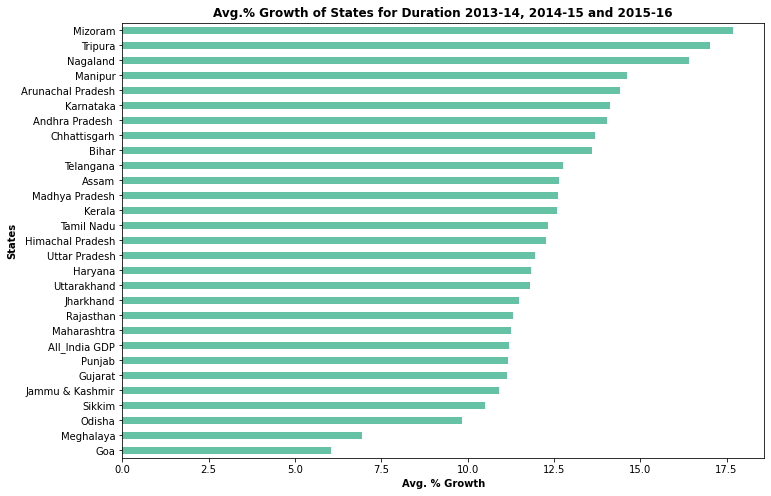

In [13]:
# Bar Plot for Average growth rates of the various states for duration 2013-14, 2014-15 and 2015-16
plt.rcParams['figure.figsize'] = [11.5,8]
dfx4_mean.plot(kind='barh',stacked=True, colormap = 'Set2')
plt.title("Avg.% Growth of States for Duration 2013-14, 2014-15 and 2015-16", fontweight = 'bold')
plt.xlabel("Avg. % Growth", fontweight = 'bold')
plt.ylabel("States", fontweight = 'bold')

Insights from the above Plot considering the average growth rates of various states for duration 2013-2016
States like Mizoram, Nagaland,Tripura and Manipur which are parts of our Eastern India has been consistently growing fast as compared to its peer states with avg growth rate of approx 15%.
Goa and Meghalaya are struggling to grow as compared to other states.

In [14]:
# Average growth rate of my home state against the National average Growth rate

dfx4_myhome = dfx4_mean[['Maharashtra','Gujarat', 'All_India GDP']]

Text(0.5, 0, 'Home State Vs National Average')

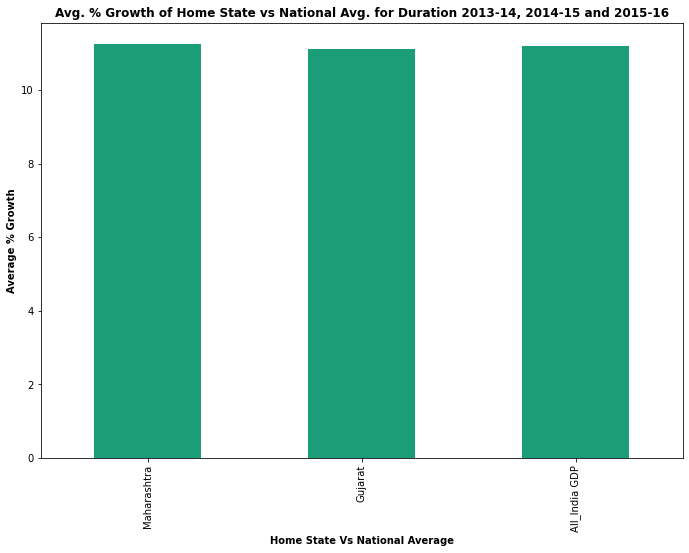

In [15]:
dfx4_myhome.plot(kind='bar',stacked=True, colormap = 'Dark2')
plt.title("Avg. % Growth of Home State vs National Avg. for Duration 2013-14, 2014-15 and 2015-16", fontweight = 'bold')
plt.ylabel("Average % Growth", fontweight = 'bold')
plt.xlabel("Home State Vs National Average", fontweight = 'bold')

Average growth rate of my home state Maharastra and Gujarat is approximately National Average growth rate(12%).

# Total GDP of the states for the year 2015-16

In [16]:
#Selecting the GSDP for year 2015-16

dfx5_total_gdp = dfx4.iloc[2:,4:5]

In [17]:
# Dropping the GSDP of All_India as it will not be included in the plot

dfx6_total_gdp = dfx5_total_gdp.drop(labels = ['All_India GDP'])


Text(0.5, 0, 'States')

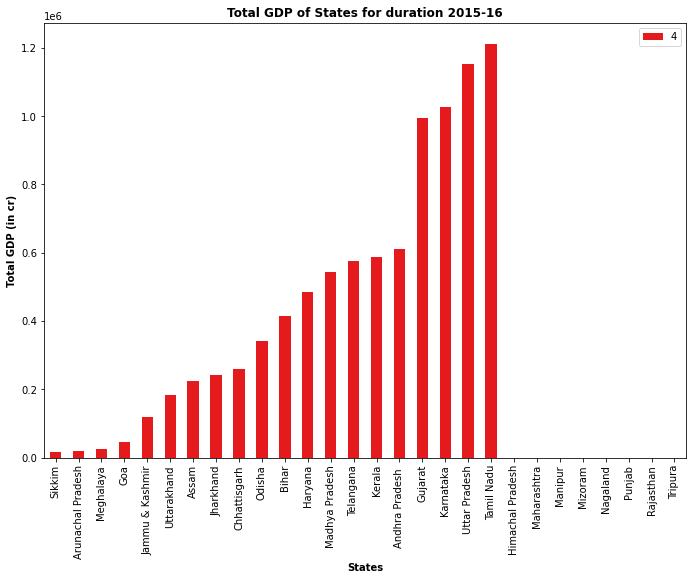

In [18]:
#Plot for GSDP of all states including States with NaN

dfx6_total_gdp.sort_values(by=4).plot(kind='bar',stacked=True, colormap = 'Set1')
plt.title("Total GDP of States for duration 2015-16" , fontweight = 'bold')
plt.ylabel("Total GDP (in cr)",fontweight = 'bold')
plt.xlabel("States",fontweight = 'bold')

In [19]:
# Dropping the States whose GSDP in NaN for year 2015-16

dfx7_total_gdp = dfx6_total_gdp.dropna().sort_values(by = 4)

Text(0.5, 0, 'States')

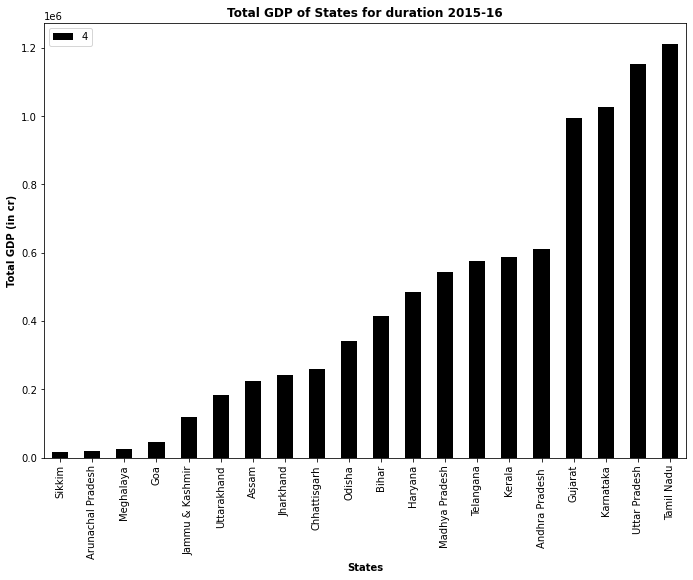

In [20]:
#Plot for GSDP of all states excluding States with NaN

dfx7_total_gdp.plot(kind='bar',stacked=True, colormap = 'copper')
plt.title("Total GDP of States for duration 2015-16" , fontweight = 'bold')
plt.ylabel("Total GDP (in cr)",fontweight = 'bold')
plt.xlabel("States",fontweight = 'bold')

In [21]:
dfx7_total_gdp.shape

(20, 1)

Text(0.5, 0, 'States')

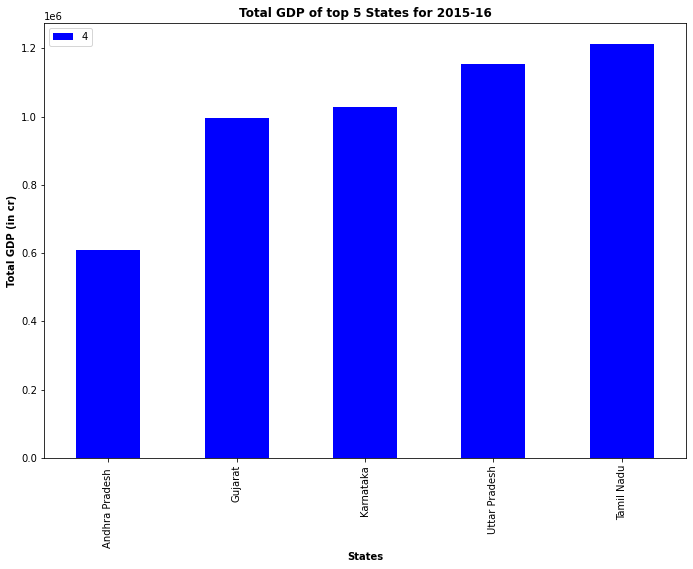

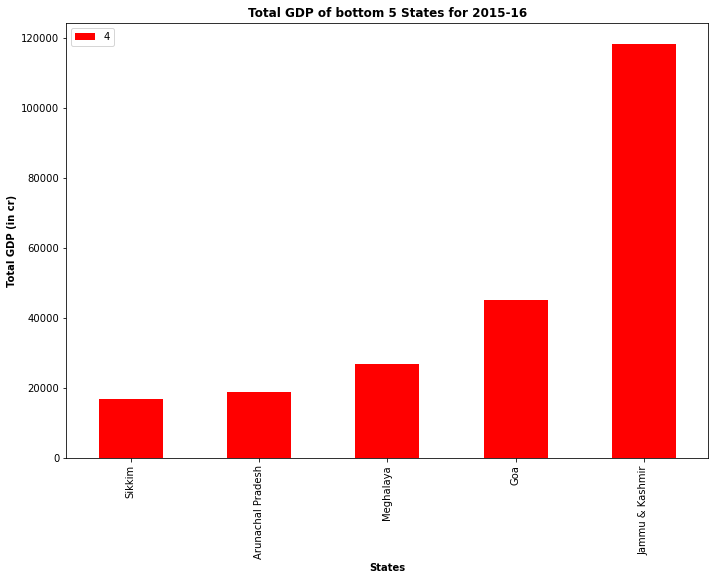

In [22]:
# GSDP of Top 5 States
dfx7_total_gdp.tail(5).plot(kind='bar',stacked=True, colormap = 'winter')
plt.title("Total GDP of top 5 States for 2015-16", fontweight = 'bold')
plt.ylabel("Total GDP (in cr)",fontweight = 'bold')
plt.xlabel("States",fontweight = 'bold')


# GSDP of Bottom 5 States
dfx7_total_gdp.head(5).plot(kind='bar',stacked=True, colormap = 'flag')
plt.title("Total GDP of bottom 5 States for 2015-16", fontweight = 'bold')
plt.ylabel("Total GDP (in cr)",fontweight = 'bold')
plt.xlabel("States",fontweight = 'bold')

Insights from the above Plot considering the GSDP of top/bottom 5 states for duration 2015-16
The top 5 states contributes almost 1/3 rd (32%) of total GSDP.
There is a significant difference in GSDP between the 5th(Andhra Pradesh) state and the rest of the top 5 states.
The bottom 5 states contributes only 1.5 % to total GSDP.
The GSDP of J&K is significantly higher than the rest of the bottom states reason being traditional recreational tourism, a vast scope exists for adventure, pilgrimage, spiritual, and health tourism